# IMPORT REQUIRED LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

import joblib

# DATA PRE-PROCESSING

### Load the dataset

In [5]:
df = pd.read_csv("dataset_med.csv")

### Check the dataset loaded properly or not

In [7]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


### Check dataset shape

In [9]:
df.shape

(890000, 17)

### Check data types

In [11]:
df.dtypes

id                      int64
age                   float64
gender                 object
country                object
diagnosis_date         object
cancer_stage           object
family_history         object
smoking_status         object
bmi                   float64
cholesterol_level       int64
hypertension            int64
asthma                  int64
cirrhosis               int64
other_cancer            int64
treatment_type         object
end_treatment_date     object
survived                int64
dtype: object

### Check missing values

In [13]:
df.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

# BASIC EDA (Exploratory Data Analysis)

### Target variable distribution

In [16]:
df['survived'].value_counts()

survived
0    693996
1    196004
Name: count, dtype: int64

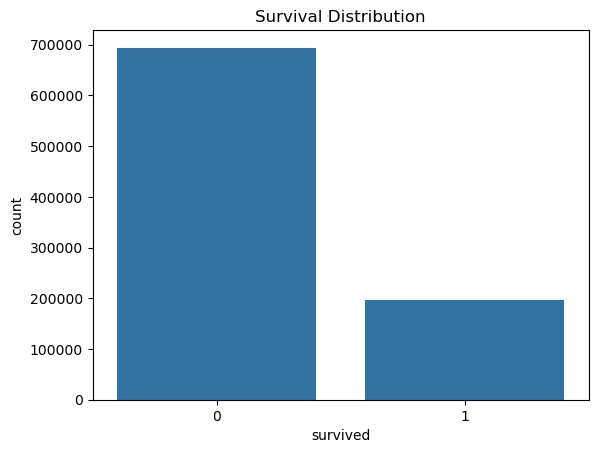

In [17]:
sns.countplot(x='survived', data=df)
plt.title("Survival Distribution")
plt.show()

### Target variable in percentage

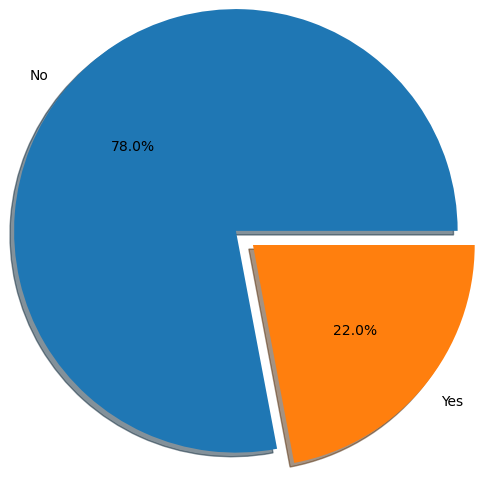

In [19]:
r = df.groupby('survived')['survived'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True);

### Age distribution

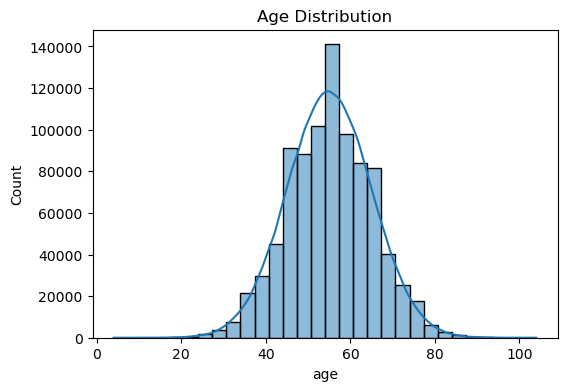

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

### Cancer stage vs survival

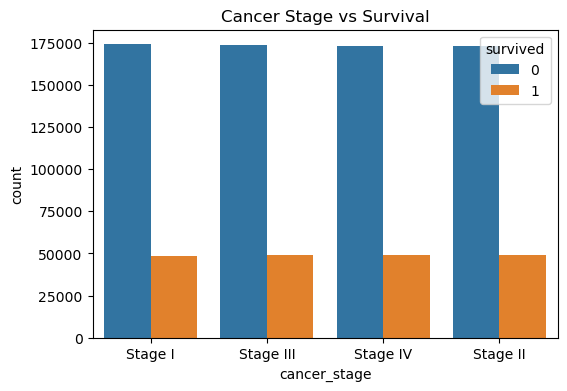

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='cancer_stage', hue='survived', data=df)
plt.title("Cancer Stage vs Survival")
plt.show()

### Smoking status vs survival

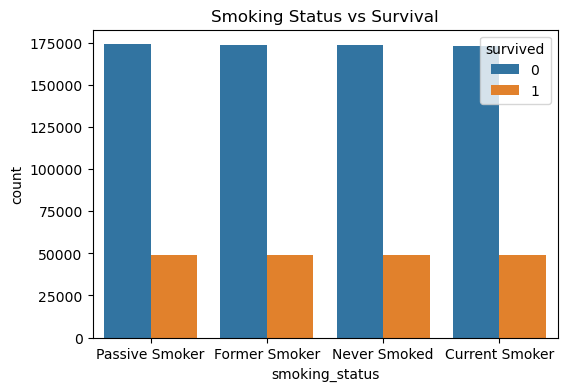

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='smoking_status', hue='survived', data=df)
plt.title("Smoking Status vs Survival")
plt.show()

# FEATURE ENGINEERING

### Drop ID column (not useful for learning)

In [28]:
df = df.drop(columns=['id'])

### Handle DATE columns
#### Convert to datetime

In [30]:
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])

#### Create treatment duration (in days)

In [32]:
df['treatment_duration_days'] = (
    df['end_treatment_date'] - df['diagnosis_date']
).dt.days

#### Drop original date columns

In [34]:
df = df.drop(columns=['diagnosis_date', 'end_treatment_date'])

### Separate input features (X) and target variable (y)

In [36]:
X = df.drop('survived', axis=1)
y = df['survived']

In [37]:
X.head()

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,treatment_duration_days
0,64.0,Male,Sweden,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,523
1,50.0,Female,Netherlands,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,424
2,65.0,Female,Hungary,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,370
3,51.0,Female,Belgium,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,443
4,37.0,Male,Luxembourg,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,406


In [38]:
X.shape

(890000, 14)

In [39]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [40]:
y.shape

(890000,)

### Convert categorical (text) columns into numerical values
### One-Hot Encoding creates new binary columns for each category
### drop_first=True is used to avoid the dummy variable trap

In [42]:
X = pd.get_dummies(
    X,
    columns=[
        'country',
        'cancer_stage',
        'family_history',
        'smoking_status',
        'treatment_type',
        'gender'
    ],
    drop_first=True
)

In [43]:
X.head()

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_duration_days,country_Belgium,country_Bulgaria,...,cancer_stage_Stage III,cancer_stage_Stage IV,family_history_Yes,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery,gender_Male
0,64.0,29.4,199,0,0,1,0,523,False,False,...,False,False,True,False,False,True,False,False,False,True
1,50.0,41.2,280,1,1,0,0,424,False,False,...,True,False,True,False,False,True,False,False,True,False
2,65.0,44.0,268,1,1,0,0,370,False,False,...,True,False,True,True,False,False,True,False,False,False
3,51.0,43.0,241,1,1,0,0,443,True,False,...,False,False,False,False,False,True,False,False,False,False
4,37.0,19.7,178,0,0,0,0,406,False,False,...,False,False,False,False,False,True,True,False,False,True


In [44]:
X.dtypes

age                              float64
bmi                              float64
cholesterol_level                  int64
hypertension                       int64
asthma                             int64
cirrhosis                          int64
other_cancer                       int64
treatment_duration_days            int64
country_Belgium                     bool
country_Bulgaria                    bool
country_Croatia                     bool
country_Cyprus                      bool
country_Czech Republic              bool
country_Denmark                     bool
country_Estonia                     bool
country_Finland                     bool
country_France                      bool
country_Germany                     bool
country_Greece                      bool
country_Hungary                     bool
country_Ireland                     bool
country_Italy                       bool
country_Latvia                      bool
country_Lithuania                   bool
country_Luxembou

# MODEL TRAINING (Random Forest)

### Train / Test Split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

### Check the shape after split

In [49]:
print("Shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

Shapes:
X_train: (712000, 45) X_test: (178000, 45)
y_train: (712000,) y_test: (178000,)


### Initialize Random Forest Classifier

In [51]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

### Train the model

In [53]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

### Make predictions

In [55]:
y_pred = rf_model.predict(X_test)

### Important features

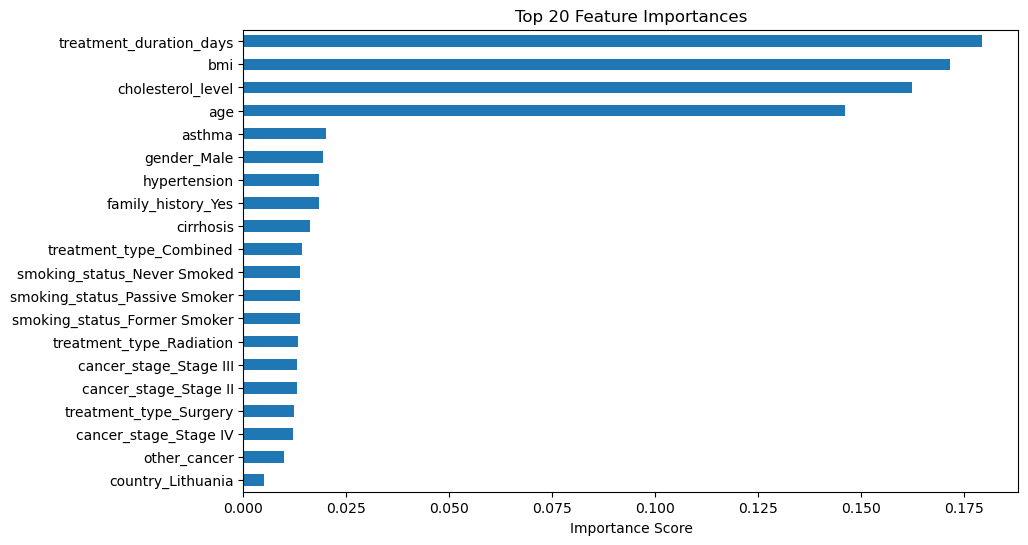

In [57]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

feat_imp = pd.Series(importances, index=feature_names)
feat_imp = feat_imp.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance Score")
plt.show()

# MODEL EVALUATION

### Classification Report (summary)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    138799
           1       0.21      0.00      0.00     39201

    accuracy                           0.78    178000
   macro avg       0.50      0.50      0.44    178000
weighted avg       0.66      0.78      0.68    178000



# MODEL DEPLOYMENT
### Save the trained model

In [62]:
joblib.dump(rf_model , "lung_cancer_survival_model.pkl")

['lung_cancer_survival_model.pkl']